In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [14]:
# Load dataset 

df = pd.read_csv(r"C:\Users\avdhoot\OneDrive\Desktop\Virtual-Environment-streamlit-Prediction-model\CodeXIntern-Projects\dataset\train.csv")

In [15]:
# --- Basic Info ---

print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())               

Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [26]:
print("Average of the column Age is :",round(df['Age'].mean()))       

Average of the column Age is : 30


In [25]:
print("Average of the column Fare is :",round(df['Fare'].mean()))

Average of the column Fare is : 32


In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


In [17]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1              # we dont need sibsp and parch if we just add them in familysize
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)           # if the person is alone == 1 

In [18]:
# lets create a function which takes Name as input and put the initials in "Title"
# and for age lets create a age  


def extract_title(name):
    m = re.search(r",\s*([^\.]+)\.", str(name))
    return m.group(1).strip() if m else "Unknown"
df["Title"] = df["Name"].apply(extract_title)

df["AgeBin"] = pd.cut(df["Age"], bins=[0,12,18,30,50,80], 
                      labels=["Child","Teen","Young Adult","Adult","Senior"])
df["FareBin"] = pd.qcut(df["Fare"], 4, labels=["Low","Medium","High","Very High"])

In [19]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

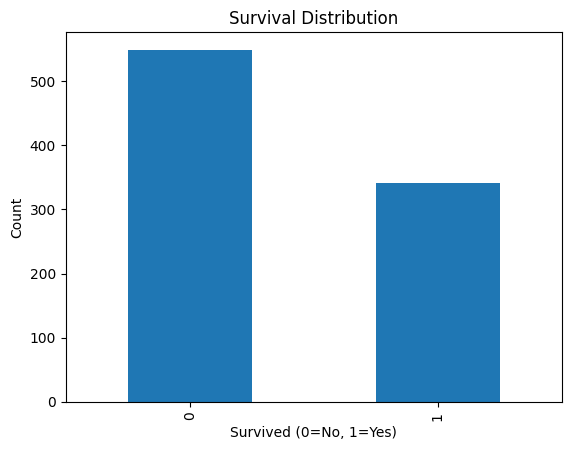

In [20]:
# --- Target Distribution ---

df["Survived"].value_counts().plot(kind="bar", title="Survival Distribution")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()